In [16]:
with open('/content/README.md', 'w') as f:
    f.write("# UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia\n")
    f.write("Nombre: Brayan Romero Bulla\n")
    f.write("CC: 1073171274\n")
    f.write("Carrera: N/A\n")

In [6]:
import numpy as np
import pandas as pd

In [15]:
from google.colab import files
uploaded = files.upload()

In [10]:
df = pd.read_csv('train.csv')
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Total de estudiantes.

In [11]:
total_estudiantes = df['ID'].nunique()
total_estudiantes

363692

Se listan los programas a los que se incribieron, y así podemos saber con cuantos programas cuenta el data set

In [ ]:
programas = sorted(df['ESTU_PRGM_ACADEMICO'].dropna().unique().tolist())
total_programas = df['ESTU_PRGM_ACADEMICO'].nunique()
total_programas

948

Con esto podemos saber cuantos estudiantes hay en cada programa

In [ ]:
conteo_por_programa = df['ESTU_PRGM_ACADEMICO'].value_counts()
print(conteo_por_programa)


ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
DEPORTE Y ACTIVIDADA FISICA                                   1
QUIMICA Y FARMACIA                                            1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES        1
COMUNICACIÓN SOCIAL Y PERIODISMO                              1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [19]:
import matplotlib.pyplot as plt

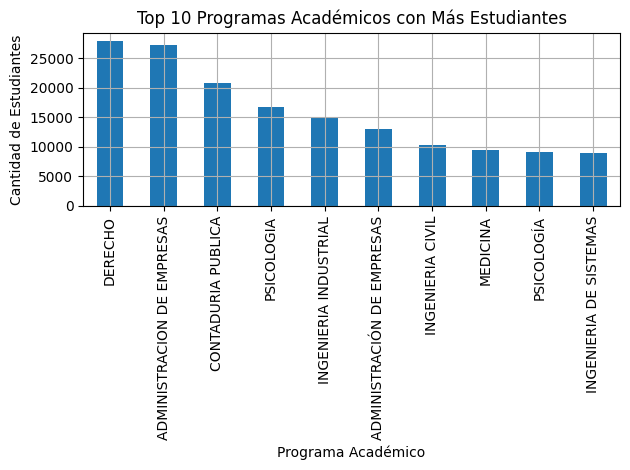

In [25]:
top_programas = df['ESTU_PRGM_ACADEMICO'].value_counts().head(10)

top_programas.plot(
    kind='bar',
    title='Top 10 Programas Académicos con Más Estudiantes'
)

plt.xlabel('Programa Académico')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

Tambien podemos extraer el numero del estudiantes vs el periodo academico

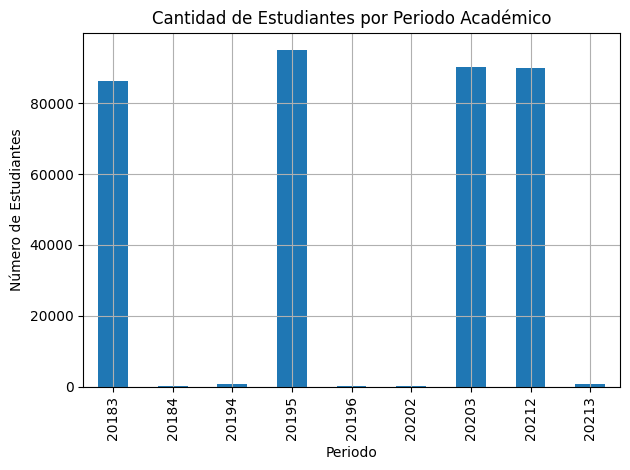

In [26]:

conteo_por_periodo = df['PERIODO'].value_counts().sort_index()


plt.figure()
conteo_por_periodo.plot(kind='bar')
plt.title('Cantidad de Estudiantes por Periodo Académico')
plt.xlabel('Periodo')
plt.ylabel('Número de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()


si nos fijamos en el formato de los datos en la columna PERIODO nos damos cuenta que al eliminar el ultimo digitos podemos saber cuantos estudiantes hay incritos por año

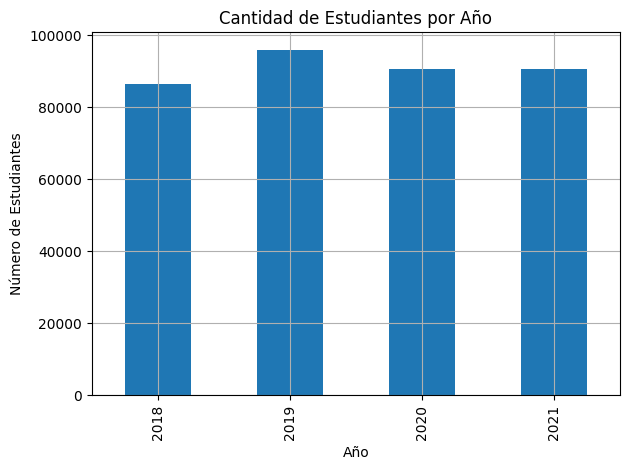

In [27]:

df_modificado = df.copy()

df_modificado['PERIODO'] = df_modificado['PERIODO'].astype(str)

df_modificado['PERIODO'] = df_modificado['PERIODO'].str.slice(0, -1)

conteo_por_periodo = df_modificado['PERIODO'].value_counts().sort_index()

# Gráfico de barras por periodo
plt.figure()
conteo_por_periodo.plot(kind='bar')
plt.title('Cantidad de Estudiantes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()



Igualmente con los departamentos

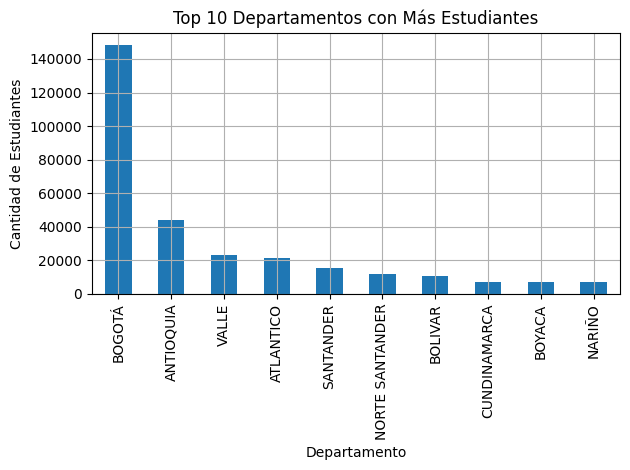

In [28]:
conteo_por_dpto = df['ESTU_PRGM_DEPARTAMENTO'].value_counts().head(10)

conteo_por_dpto.plot(
    kind='bar',
    title='Top 10 Departamentos con Más Estudiantes'
)

plt.xlabel('Departamento')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

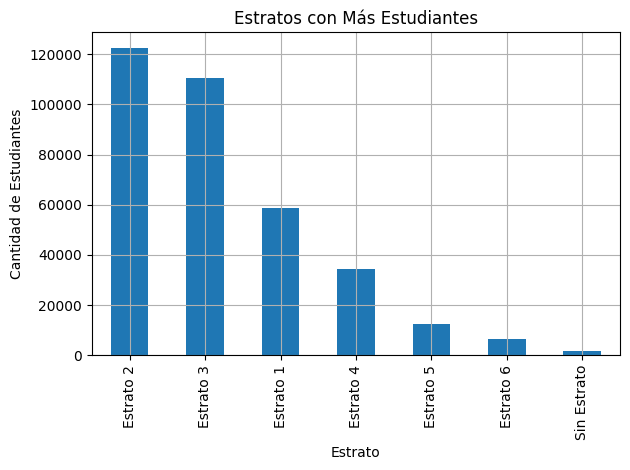

In [36]:
conteo_por_estratos = df['FAMI_ESTRATOVIVIENDA'].value_counts().head(10)

conteo_por_estratos.plot(
    kind='bar',
    title='Estratos con Más Estudiantes'
)

plt.xlabel('Estrato')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

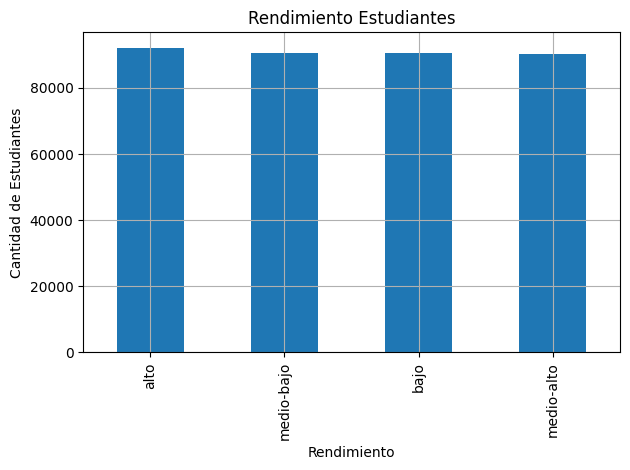

In [37]:
conteo_por_rendimiento = df['RENDIMIENTO_GLOBAL'].value_counts()

conteo_por_rendimiento.plot(
    kind='bar',
    title='Rendimiento Estudiantes'
)

plt.xlabel('Rendimiento')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

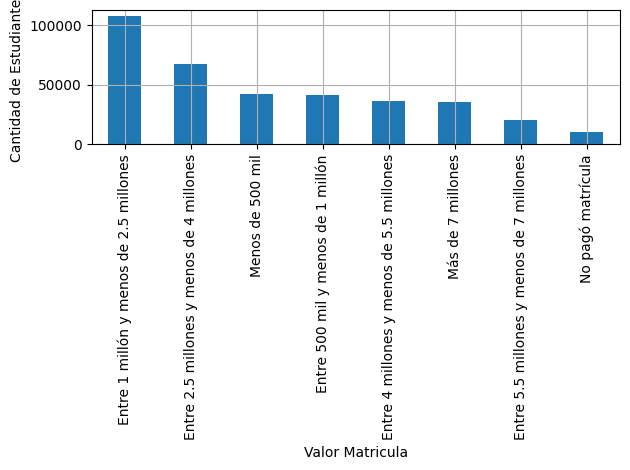

In [38]:
conteo_por_valor_matricula = df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

conteo_por_valor_matricula.plot(
    kind='bar',
)

plt.xlabel('Valor Matricula')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()